In [1]:
import oursin as urchin

In [2]:
urchin.setup(localhost=True, standalone=True)

(URN) connected to server
Login sent with ID: 4edeb2b3, copy this ID into the renderer to connect.


In [3]:
import nibabel as nib

# Specify the path to your NIfTI file
nii_file_path = './A22070 dynsavgd.nii'

# Load the NIfTI file
nii_img = nib.load(nii_file_path)

# Access the image data as a NumPy array
data_array = nii_img.get_fdata()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

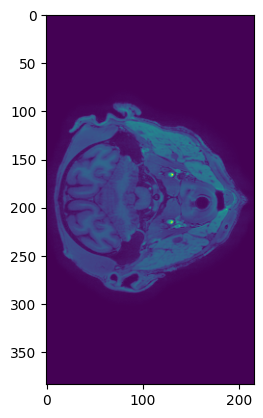

In [5]:
rotated = np.rot90(data_array, k=1, axes=(0,1))
plt.imshow(rotated[250,:,:]) # this should be a coronal slice

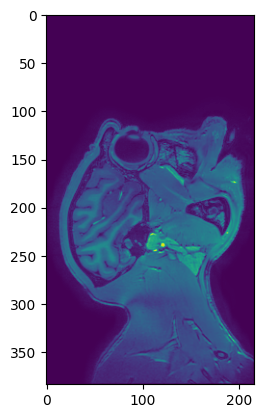

In [6]:

plt.imshow(rotated[:,150,:]) # this should be a sagittal slice

In [7]:
header = nii_img.header

# Get voxel dimensions (sizes)
voxel_sizes = header.get_zooms()

In [8]:
dimensions = [dimIdx * size for dimIdx, size in zip(data_array.shape, voxel_sizes)]
print(dimensions)
resolution = [500, 500, 500]

[192.0, 192.0, 108.0]


In [10]:
volume, quantiles = urchin.volumes.compress_volume(rotated)
colormap = urchin.volumes.colormap(datapoints=quantiles)

In [11]:
volume[rotated==0] = 255

In [14]:
urchin.camera.main.set_mode('perspective')

In [16]:
atlas = urchin.ontology.CustomAtlas("MRI", dimensions, resolution)
vol = urchin.volumes.Volume(volume, colormap)

{'name': 'MRI', 'dimensions': [192.0, 192.0, 108.0], 'resolution': [500.0, 500.0, 500.0]}
Data fits in 8 chunks of 1MB or less


(URN) disconnected from server
